In [42]:
import numpy as np
import pandas as pd
import math
from collections import defaultdict
from collections import OrderedDict

full_data = pd.read_csv("./Oxide_glass_1_5_02142020.csv")
full_data = full_data.drop(["Index", "Code", "Glass #", "Author", "Year", "Trademark", "Glass_composition", "Young's modulus E (GPa)", "Shear modulus G (GPa)", "Poisson's ratio v"], axis = 1)
full_data.head()

,Al2O3,As2O5,B2O3,BaO,BeO,CaO,CdO,Cs2O,Ga2O3,K2O,...,P2O5,PbO,Sc2O3,SiO2,SnO2,SrO,TiO2,Y2O3,ZnO,ZrO2
0,2.0,0.0,0.000000,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,78.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,6.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,60.000002,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,87.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,85.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,78.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
sample_0 = full_data.iloc[0, :]
# for col in full_data.columns:
#     print(col)
# for i in sample_0:
#     print(i)
compound_names = [col for col in full_data.columns]
print(compound_names)

['Al2O3', 'As2O5', 'B2O3', 'BaO', 'BeO', 'CaO', 'CdO', 'Cs2O', 'Ga2O3', 'K2O', 'La2O3', 'Li2O', 'MgO', 'Na2O', 'P2O5', 'PbO', 'Sc2O3', 'SiO2', 'SnO2', 'SrO', 'TiO2', 'Y2O3', 'ZnO', 'ZrO2']


In [44]:
compound_makeups = pd.read_csv("./atomicquant_Descriptor_table_oxide_series_4.csv")

compound_makeups = compound_makeups.drop(["Unnamed: 0"], axis=1)
element_names = [col for col in compound_makeups.columns]
print(element_names)
compound_makeups_dict = defaultdict(dict)

compound_makeups.head()
for i in range(len(compound_makeups)):
    for j in range(len(compound_makeups.columns)):
        if compound_makeups.iloc[i, j] > 0:
            compound_makeups_dict[compound_names[i]][element_names[j]] = compound_makeups.iloc[i, j]
compound_makeups_dict

['Al', 'As', 'B', 'Ba', 'Be', 'Ca', 'Cd', 'Cs', 'Ga', 'K', 'La', 'Li', 'Mg', 'Na', 'O', 'P', 'Pb', 'Sc', 'Si', 'Sn', 'Sr', 'Ti', 'Y', 'Zn', 'Zr']


defaultdict(dict,
            {'Al2O3': {'Al': 2, 'O': 3},
             'As2O5': {'As': 2, 'O': 5},
             'B2O3': {'B': 2, 'O': 3},
             'BaO': {'Ba': 1, 'O': 1},
             'BeO': {'Be': 1, 'O': 1},
             'CaO': {'Ca': 1, 'O': 1},
             'CdO': {'Cd': 1, 'O': 1},
             'Cs2O': {'Cs': 2, 'O': 1},
             'Ga2O3': {'Ga': 2, 'O': 3},
             'K2O': {'K': 2, 'O': 1},
             'La2O3': {'La': 2, 'O': 3},
             'Li2O': {'Li': 2, 'O': 1},
             'MgO': {'Mg': 1, 'O': 1},
             'Na2O': {'Na': 2, 'O': 1},
             'P2O5': {'O': 5, 'P': 2},
             'PbO': {'O': 1, 'Pb': 1},
             'Sc2O3': {'O': 3, 'Sc': 2},
             'SiO2': {'O': 2, 'Si': 1},
             'SnO2': {'O': 2, 'Sn': 1},
             'SrO': {'O': 1, 'Sr': 1},
             'TiO2': {'O': 2, 'Ti': 1},
             'Y2O3': {'O': 3, 'Y': 2},
             'ZnO': {'O': 1, 'Zn': 1},
             'ZrO2': {'O': 2, 'Zr': 1}})

In [45]:
#Do it for the first row
compound_moleper = defaultdict(float)
for i in range(24):
    if sample_0[i] > 0.0:
        compound_moleper[compound_names[i]] = sample_0[i]/100
compound_moleper

defaultdict(float, {'Al2O3': 0.02, 'CaO': 0.05, 'Na2O': 0.15, 'SiO2': 0.78})

In [46]:
weighted_elements = defaultdict(float)
for i in compound_moleper.keys():
    for j in compound_makeups_dict[i].keys():
        weighted_elements[j] += compound_makeups_dict[i][j] * compound_moleper[i]
weighted_elements

defaultdict(float, {'Al': 0.04, 'O': 1.82, 'Ca': 0.05, 'Na': 0.3, 'Si': 0.78})

In [47]:
s = 0
for i in weighted_elements.keys():
    s += weighted_elements[i]
print(s)


2.99


In [48]:
percentage_weights = defaultdict(float)
for i in weighted_elements.keys():
    percentage_weights[i] = (weighted_elements[i]/s) * 100
percentage_weights

total_sum = 0
for i in percentage_weights.keys():
    total_sum += percentage_weights[i]
total_sum

100.0

In [49]:
#Now do it for all the rows
all_percentage_weights = []
for i in range(len(full_data)):
    sample_0 = full_data.iloc[i, :]
    compound_moleper = defaultdict(float)
    oxygen = 0.0
    for j in range(24):
        #if sample_0 > 0.0: #Only add this line if the elements that don't exist in the sample are not necessary
        compound_moleper[compound_names[j]] = sample_0[j]/100
    weighted_elements = defaultdict(float)
    for i in compound_moleper.keys():
        for j in compound_makeups_dict[i].keys():
            weighted_elements[j] += compound_makeups_dict[i][j] * compound_moleper[i]
    s = 0
    for i in weighted_elements.keys():
        s += weighted_elements[i]
    percentage_weights = defaultdict(float)
    for i in weighted_elements.keys():
        percentage_weights[i] = (weighted_elements[i]/s)
    all_percentage_weights.append(OrderedDict(sorted(percentage_weights.items())))
all_percentage_weights

#80 50 train test split
#5 4 cross valid
#try a vector

#1. Try the BASE data with random forest to predict youngs modulus, etc. (Use elements to predict the youngs mod, etc.)
#2. Maybe then try it with the features!
#3. Maybe then combine them
#Comment all your code
#Make FUNCTIONS AND CLASSES instead of straight up code

[OrderedDict([('Al', 0.013377926421404682),
              ('As', 0.0),
              ('B', 0.0),
              ('Ba', 0.0),
              ('Be', 0.0),
              ('Ca', 0.016722408026755852),
              ('Cd', 0.0),
              ('Cs', 0.0),
              ('Ga', 0.0),
              ('K', 0.0),
              ('La', 0.0),
              ('Li', 0.0),
              ('Mg', 0.0),
              ('Na', 0.1003344481605351),
              ('O', 0.608695652173913),
              ('P', 0.0),
              ('Pb', 0.0),
              ('Sc', 0.0),
              ('Si', 0.2608695652173913),
              ('Sn', 0.0),
              ('Sr', 0.0),
              ('Ti', 0.0),
              ('Y', 0.0),
              ('Zn', 0.0),
              ('Zr', 0.0)]),
 OrderedDict([('Al', 0.0),
              ('As', 0.0),
              ('B', 0.042553194748755095),
              ('Ba', 0.0),
              ('Be', 0.0),
              ('Ca', 0.0),
              ('Cd', 0.0),
              ('Cs', 0.0),
              ('Ga

In [50]:
feature_data = pd.read_csv("./element_Descriptor_table_oxide_series_4.csv")


feature_data = feature_data.drop(["Unnamed: 0"], axis = 1)
feature_data = feature_data.dropna()
feature_names = [col for col in feature_data.columns]

#print(feature_names)
feature_data = feature_data.astype('float64')
feature_data.index -= 1
feature_data

,AtomicNumber,AtomicPeriod,AtomicGroup,AtomicWeight,EmpiricalRadius,CalculaterRadius,MolarVolume,Electronegativity,AbsoluteMeltingPoint,Oxidation_States,Bond dissociation energy,Assumed CN
0,13.0,3.0,13.0,26.981538,125.0,118.0,10.000,1.61,933.47,3.0,512.0,4.00
1,33.0,4.0,15.0,74.921595,115.0,114.0,13.080,2.18,1090.00,5.0,481.0,5.00
2,5.0,2.0,13.0,10.810000,85.0,87.0,4.394,2.04,2348.00,3.0,806.0,3.00
3,56.0,6.0,2.0,137.327000,215.0,253.0,39.120,0.89,1000.00,2.0,563.0,8.00
4,4.0,2.0,2.0,9.012183,105.0,112.0,4.877,1.57,1560.00,2.0,448.0,4.00
5,20.0,4.0,2.0,40.078000,180.0,194.0,25.860,1.00,1115.00,2.0,464.0,6.00
6,48.0,5.0,12.0,112.414000,155.0,161.0,13.000,1.69,594.22,2.0,142.0,4.00
7,55.0,6.0,1.0,132.905452,260.0,298.0,70.730,0.79,301.59,1.0,297.0,11.00
8,31.0,4.0,13.0,69.723000,130.0,136.0,11.810,1.81,302.91,3.0,285.0,3.00
9,19.0,4.0,1.0,39.098300,220.0,243.0,45.700,0.82,336.53,1.0,239.0,9.00


In [51]:
list_all_percentage_weights = []
for i in all_percentage_weights:
    current_sample_weights = []
    for j in i.keys():
        current_sample_weights.append(float(i[j]))
    list_all_percentage_weights.append(current_sample_weights)
list_all_percentage_weights

[[0.013377926421404682,
  0.0,
  0.0,
  0.0,
  0.0,
  0.016722408026755852,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.1003344481605351,
  0.608695652173913,
  0.0,
  0.0,
  0.0,
  0.2608695652173913,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.042553194748755095,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.21276594182888192,
  0.5531914966274332,
  0.0,
  0.0,
  0.0,
  0.1914893667949298,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.3686868686868687,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.052188552188552194,
  0.0,
  0.0,
  0.5791245791245792,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.09999999999999999,
  0.0,
  0.0,
  0.6166666666666666,
  0.0,
  0.0,
  0.0,
  0.2833333333333333,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.013377926421404682,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0

In [52]:
glass_percentage_weights = pd.DataFrame(list_all_percentage_weights)
glass_percentage_weights

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.013378,0.0,0.000000,0.0,0.0,0.016722,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.260870,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.042553,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.191489,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.368687,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.283333,0.0,0.0,0.0,0.0,0.0,0.0
4,0.013378,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.260870,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,0.001771,0.0,0.028337,0.0,0.0,0.096303,0.0,0.0,0.0,0.0,...,0.201018,0.0,0.0,0.007527,0.0,0.0,0.0,0.0,0.0,0.0
1599,0.025974,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.203571,0.0,0.0,0.0,0.0,0.0,0.0
1600,0.038462,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.194551,0.0,0.0,0.0,0.0,0.0,0.0
1601,0.000000,0.0,0.308437,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
samples_by_features = glass_percentage_weights.dot(feature_data) #N by Q matrix
samples_by_features


,AtomicNumber,AtomicPeriod,AtomicGroup,AtomicWeight,EmpiricalRadius,CalculaterRadius,MolarVolume,Electronegativity,AbsoluteMeltingPoint,Oxidation_States,Bond dissociation energy,Assumed CN
0,10.133779,2.408027,13.698997,20.402867,87.959866,82.060201,6.087625,2.721137,541.787893,1.217391,248.568562,1.799331
1,9.659574,2.404255,12.297873,19.579930,96.170211,91.936168,7.536978,2.551489,532.180862,1.106383,241.787237,2.170213
2,6.632997,2.000000,14.111111,13.613108,73.653199,68.589226,2.298461,2.795455,921.090219,1.158249,314.957912,1.314815
3,9.200000,2.283333,13.933333,18.517467,82.666667,77.750000,4.714167,2.757667,557.145667,1.233333,260.200000,1.533333
4,10.000000,2.391304,13.698997,20.139104,87.458194,81.240803,5.979565,2.726321,538.577191,1.217391,247.397993,1.782609
...,...,...,...,...,...,...,...,...,...,...,...,...
1598,10.543724,2.406907,14.285588,21.319318,81.275183,74.380341,6.233064,2.889241,289.752406,1.322116,195.389595,1.528005
1599,10.000000,2.445779,12.271429,20.256265,97.814935,93.348377,7.837516,2.536221,478.236890,1.108442,231.320779,2.215584
1600,10.000000,2.446474,12.293590,20.265012,97.842949,93.260577,7.787997,2.534218,473.610391,1.107051,229.803846,2.212821
1601,7.532503,2.152605,12.785615,15.465346,86.023513,81.698940,4.972008,2.625150,810.341710,1.077916,287.819733,1.840941


In [54]:
print(samples_by_features.at[0, 'AtomicWeight'])
print(len(feature_names))
print(len(samples_by_features))
for i in range(len(feature_names)):
    for j in range(len(samples_by_features)): #current_value = 
        current_value = samples_by_features.at[j, feature_names[i]]
        #print(current_value)
        #print(feature_names[i])
        min_value = samples_by_features[feature_names[i]].min()
        #print(min_value)
        max_value = samples_by_features[feature_names[i]].max()
        #print(max_value)
        xx = (current_value - min_value)/(max_value - min_value)
        samples_by_features.at[j, feature_names[i]] = xx
transformed_samples_by_features = samples_by_features
transformed_samples_by_features

20.40286699799331
12
1603


,AtomicNumber,AtomicPeriod,AtomicGroup,AtomicWeight,EmpiricalRadius,CalculaterRadius,MolarVolume,Electronegativity,AbsoluteMeltingPoint,Oxidation_States,Bond dissociation energy,Assumed CN
0,0.227956,0.408027,0.598951,0.178778,0.472892,0.443186,0.331975,0.495368,0.489134,0.507246,0.533467,0.379360
1,0.396753,0.770158,0.773977,0.343519,0.890159,0.859400,0.497966,0.794640,0.547238,0.650299,0.749546,0.718072
2,0.269436,0.614194,0.893937,0.237870,0.680710,0.640101,0.135912,0.888926,0.947519,0.706594,0.976878,0.375086
3,0.377420,0.723505,0.882176,0.324707,0.764551,0.726149,0.312191,0.874322,0.572933,0.788090,0.806752,0.463624
4,0.411073,0.765161,0.866673,0.353420,0.809121,0.758938,0.398478,0.862208,0.553822,0.770787,0.766978,0.563404
...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.000000,0.980590,1.000000,1.000000,0.829847,0.795834,0.792325,1.000000,0.324622,1.000000,0.639298,0.636985
1599,1.000000,0.999659,0.883776,0.999565,0.999712,1.000000,1.000000,0.903459,0.535886,0.950448,0.757169,1.000000
1600,1.000000,1.000000,0.885454,1.000000,1.000000,1.000000,1.000000,0.902572,0.530701,0.948250,0.752193,1.000000
1601,1.000000,1.000000,0.922708,1.000000,1.000000,1.000000,1.000000,0.942826,0.908129,0.902190,0.942512,1.000000


In [55]:
def squared_function(df, feature_names):
    for i in range(len(feature_names)):
        new_row = []
        for j in range(len(df)):
            current_value = df.at[j, feature_names[i]]
            squared = current_value * current_value
            new_row.append(squared)
        name = feature_names[i] + " Squared"
        df[name] = new_row
    return df
transformed_samples_by_features = squared_function(transformed_samples_by_features, feature_names)
transformed_samples_by_features

,AtomicNumber,AtomicPeriod,AtomicGroup,AtomicWeight,EmpiricalRadius,CalculaterRadius,MolarVolume,Electronegativity,AbsoluteMeltingPoint,Oxidation_States,...,AtomicGroup Squared,AtomicWeight Squared,EmpiricalRadius Squared,CalculaterRadius Squared,MolarVolume Squared,Electronegativity Squared,AbsoluteMeltingPoint Squared,Oxidation_States Squared,Bond dissociation energy Squared,Assumed CN Squared
0,0.227956,0.408027,0.598951,0.178778,0.472892,0.443186,0.331975,0.495368,0.489134,0.507246,...,0.358743,0.031961,0.223627,0.196414,0.110207,0.245389,0.239252,0.257299,0.284587,0.143914
1,0.396753,0.770158,0.773977,0.343519,0.890159,0.859400,0.497966,0.794640,0.547238,0.650299,...,0.599040,0.118005,0.792382,0.738569,0.247970,0.631452,0.299470,0.422889,0.561819,0.515628
2,0.269436,0.614194,0.893937,0.237870,0.680710,0.640101,0.135912,0.888926,0.947519,0.706594,...,0.799124,0.056582,0.463366,0.409729,0.018472,0.790190,0.897793,0.499275,0.954291,0.140690
3,0.377420,0.723505,0.882176,0.324707,0.764551,0.726149,0.312191,0.874322,0.572933,0.788090,...,0.778234,0.105435,0.584539,0.527292,0.097463,0.764439,0.328252,0.621086,0.650849,0.214947
4,0.411073,0.765161,0.866673,0.353420,0.809121,0.758938,0.398478,0.862208,0.553822,0.770787,...,0.751121,0.124906,0.654677,0.575987,0.158785,0.743402,0.306718,0.594112,0.588255,0.317424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.000000,0.980590,1.000000,1.000000,0.829847,0.795834,0.792325,1.000000,0.324622,1.000000,...,1.000000,1.000000,0.688647,0.633353,0.627779,1.000000,0.105379,1.000000,0.408702,0.405750
1599,1.000000,0.999659,0.883776,0.999565,0.999712,1.000000,1.000000,0.903459,0.535886,0.950448,...,0.781061,0.999129,0.999425,1.000000,1.000000,0.816238,0.287174,0.903352,0.573305,1.000000
1600,1.000000,1.000000,0.885454,1.000000,1.000000,1.000000,1.000000,0.902572,0.530701,0.948250,...,0.784029,1.000000,1.000000,1.000000,1.000000,0.814636,0.281643,0.899179,0.565794,1.000000
1601,1.000000,1.000000,0.922708,1.000000,1.000000,1.000000,1.000000,0.942826,0.908129,0.902190,...,0.851390,1.000000,1.000000,1.000000,1.000000,0.888922,0.824699,0.813946,0.888329,1.000000


In [56]:
def squareroot_function(df, feature_names):
    for i in range(len(feature_names)):
        new_row = []
        for j in range(len(df)):
            current_value = df.at[j, feature_names[i]]
            a = current_value ** 0.5
            new_row.append(a)
        name = feature_names[i] + " Square Root"
        df[name] = new_row
    return df
transformed_samples_by_features = squareroot_function(transformed_samples_by_features, feature_names)
transformed_samples_by_features

,AtomicNumber,AtomicPeriod,AtomicGroup,AtomicWeight,EmpiricalRadius,CalculaterRadius,MolarVolume,Electronegativity,AbsoluteMeltingPoint,Oxidation_States,...,AtomicGroup Square Root,AtomicWeight Square Root,EmpiricalRadius Square Root,CalculaterRadius Square Root,MolarVolume Square Root,Electronegativity Square Root,AbsoluteMeltingPoint Square Root,Oxidation_States Square Root,Bond dissociation energy Square Root,Assumed CN Square Root
0,0.227956,0.408027,0.598951,0.178778,0.472892,0.443186,0.331975,0.495368,0.489134,0.507246,...,0.773920,0.422821,0.687671,0.665722,0.576173,0.703824,0.699381,0.712212,0.730388,0.615922
1,0.396753,0.770158,0.773977,0.343519,0.890159,0.859400,0.497966,0.794640,0.547238,0.650299,...,0.879760,0.586105,0.943482,0.927038,0.705667,0.891426,0.739756,0.806411,0.865763,0.847391
2,0.269436,0.614194,0.893937,0.237870,0.680710,0.640101,0.135912,0.888926,0.947519,0.706594,...,0.945483,0.487719,0.825051,0.800063,0.368662,0.942829,0.973406,0.840591,0.988372,0.612443
3,0.377420,0.723505,0.882176,0.324707,0.764551,0.726149,0.312191,0.874322,0.572933,0.788090,...,0.939242,0.569831,0.874386,0.852144,0.558740,0.935052,0.756923,0.887744,0.898194,0.680899
4,0.411073,0.765161,0.866673,0.353420,0.809121,0.758938,0.398478,0.862208,0.553822,0.770787,...,0.930952,0.594491,0.899512,0.871170,0.631251,0.928551,0.744192,0.877944,0.875773,0.750602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.000000,0.980590,1.000000,1.000000,0.829847,0.795834,0.792325,1.000000,0.324622,1.000000,...,1.000000,1.000000,0.910960,0.892096,0.890126,1.000000,0.569756,1.000000,0.799561,0.798113
1599,1.000000,0.999659,0.883776,0.999565,0.999712,1.000000,1.000000,0.903459,0.535886,0.950448,...,0.940094,0.999782,0.999856,1.000000,1.000000,0.950504,0.732043,0.974909,0.870155,1.000000
1600,1.000000,1.000000,0.885454,1.000000,1.000000,1.000000,1.000000,0.902572,0.530701,0.948250,...,0.940986,1.000000,1.000000,1.000000,1.000000,0.950038,0.728492,0.973781,0.867291,1.000000
1601,1.000000,1.000000,0.922708,1.000000,1.000000,1.000000,1.000000,0.942826,0.908129,0.902190,...,0.960577,1.000000,1.000000,1.000000,1.000000,0.970993,0.952958,0.949837,0.970831,1.000000


In [57]:
def exponential_function(df, feature_names):
    for i in range(len(feature_names)):
        new_row = []
        for j in range(len(df)):
            current_value = df.at[j, feature_names[i]]
            a = math.exp(current_value)
            new_row.append(a)
        name = feature_names[i] + " Exponential"
        df[name] = new_row
    return df
transformed_samples_by_features = exponential_function(transformed_samples_by_features, feature_names)
transformed_samples_by_features

,AtomicNumber,AtomicPeriod,AtomicGroup,AtomicWeight,EmpiricalRadius,CalculaterRadius,MolarVolume,Electronegativity,AbsoluteMeltingPoint,Oxidation_States,...,AtomicGroup Exponential,AtomicWeight Exponential,EmpiricalRadius Exponential,CalculaterRadius Exponential,MolarVolume Exponential,Electronegativity Exponential,AbsoluteMeltingPoint Exponential,Oxidation_States Exponential,Bond dissociation energy Exponential,Assumed CN Exponential
0,0.227956,0.408027,0.598951,0.178778,0.472892,0.443186,0.331975,0.495368,0.489134,0.507246,...,1.820209,1.195755,1.604628,1.557663,1.393718,1.641102,1.630903,1.660712,1.704833,1.461349
1,0.396753,0.770158,0.773977,0.343519,0.890159,0.859400,0.497966,0.794640,0.547238,0.650299,...,2.168373,1.409901,2.435516,2.361744,1.645372,2.213643,1.728473,1.916113,2.116039,2.050476
2,0.269436,0.614194,0.893937,0.237870,0.680710,0.640101,0.135912,0.888926,0.947519,0.706594,...,2.444736,1.268544,1.975279,1.896672,1.145581,2.432516,2.579303,2.027075,2.656152,1.455117
3,0.377420,0.723505,0.882176,0.324707,0.764551,0.726149,0.312191,0.874322,0.572933,0.788090,...,2.416151,1.383625,2.148030,2.067104,1.366416,2.397249,1.773461,2.199192,2.240619,1.589825
4,0.411073,0.765161,0.866673,0.353420,0.809121,0.758938,0.398478,0.862208,0.553822,0.770787,...,2.378982,1.423929,2.245933,2.136007,1.489556,2.368384,1.739890,2.161466,2.153249,1.756642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.000000,0.980590,1.000000,1.000000,0.829847,0.795834,0.792325,1.000000,0.324622,1.000000,...,2.718282,2.718282,2.292969,2.216290,2.208525,2.718282,1.383507,2.718282,1.895151,1.890772
1599,1.000000,0.999659,0.883776,0.999565,0.999712,1.000000,1.000000,0.903459,0.535886,0.950448,...,2.420021,2.717098,2.717500,2.718282,2.718282,2.468125,1.708962,2.586869,2.132232,2.718282
1600,1.000000,1.000000,0.885454,1.000000,1.000000,1.000000,1.000000,0.902572,0.530701,0.948250,...,2.424085,2.718282,2.718282,2.718282,2.718282,2.465938,1.700123,2.581189,2.121648,2.718282
1601,1.000000,1.000000,0.922708,1.000000,1.000000,1.000000,1.000000,0.942826,0.908129,0.902190,...,2.516094,2.718282,2.718282,2.718282,2.718282,2.567227,2.479679,2.464995,2.566420,2.718282


In [58]:
def logarithmic_function(df, feature_names): #base e
    for i in range(len(feature_names)):
        new_row = []
        for j in range(len(df)):
            current_value = df.at[j, feature_names[i]]
            a = np.log(1 + current_value)
            new_row.append(a)
        name = feature_names[i] + " Logarithmic"
        df[name] = new_row
    return df
transformed_samples_by_features = logarithmic_function(transformed_samples_by_features, feature_names)
transformed_samples_by_features

,AtomicNumber,AtomicPeriod,AtomicGroup,AtomicWeight,EmpiricalRadius,CalculaterRadius,MolarVolume,Electronegativity,AbsoluteMeltingPoint,Oxidation_States,...,AtomicGroup Logarithmic,AtomicWeight Logarithmic,EmpiricalRadius Logarithmic,CalculaterRadius Logarithmic,MolarVolume Logarithmic,Electronegativity Logarithmic,AbsoluteMeltingPoint Logarithmic,Oxidation_States Logarithmic,Bond dissociation energy Logarithmic,Assumed CN Logarithmic
0,0.227956,0.408027,0.598951,0.178778,0.472892,0.443186,0.331975,0.495368,0.489134,0.507246,...,0.469348,0.164478,0.387228,0.366853,0.286663,0.402372,0.398195,0.410284,0.427531,0.321620
1,0.396753,0.770158,0.773977,0.343519,0.890159,0.859400,0.497966,0.794640,0.547238,0.650299,...,0.573224,0.295292,0.636661,0.620254,0.404108,0.584804,0.436472,0.500956,0.559356,0.541203
2,0.269436,0.614194,0.893937,0.237870,0.680710,0.640101,0.135912,0.888926,0.947519,0.706594,...,0.638658,0.213392,0.519216,0.494758,0.127436,0.636008,0.666556,0.534500,0.681519,0.318516
3,0.377420,0.723505,0.882176,0.324707,0.764551,0.726149,0.312191,0.874322,0.572933,0.788090,...,0.632428,0.281191,0.567896,0.545893,0.271698,0.628247,0.452942,0.581148,0.591531,0.380916
4,0.411073,0.765161,0.866673,0.353420,0.809121,0.758938,0.398478,0.862208,0.553822,0.770787,...,0.624157,0.302635,0.592841,0.564710,0.335385,0.621763,0.440717,0.571424,0.569271,0.446866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.000000,0.980590,1.000000,1.000000,0.829847,0.795834,0.792325,1.000000,0.324622,1.000000,...,0.693147,0.693147,0.604233,0.585470,0.583514,0.693147,0.281127,0.693147,0.494268,0.492856
1599,1.000000,0.999659,0.883776,0.999565,0.999712,1.000000,1.000000,0.903459,0.535886,0.950448,...,0.633278,0.692929,0.693003,0.693147,0.693147,0.643673,0.429108,0.668059,0.563704,0.693147
1600,1.000000,1.000000,0.885454,1.000000,1.000000,1.000000,1.000000,0.902572,0.530701,0.948250,...,0.634169,0.693147,0.693147,0.693147,0.693147,0.643207,0.425726,0.666932,0.560868,0.693147
1601,1.000000,1.000000,0.922708,1.000000,1.000000,1.000000,1.000000,0.942826,0.908129,0.902190,...,0.653735,0.693147,0.693147,0.693147,0.693147,0.664144,0.646123,0.643006,0.663982,0.693147


In [59]:
def inverse_function(df, feature_names): #base e
    for i in range(len(feature_names)):
        new_row = []
        for j in range(len(df)):
            current_value = df.at[j, feature_names[i]]
            a = 1/(1 + current_value)
            new_row.append(a)
        name = feature_names[i] + " Inverse"
        df[name] = new_row
    return df
transformed_samples_by_features = inverse_function(transformed_samples_by_features, feature_names)
transformed_samples_by_features

,AtomicNumber,AtomicPeriod,AtomicGroup,AtomicWeight,EmpiricalRadius,CalculaterRadius,MolarVolume,Electronegativity,AbsoluteMeltingPoint,Oxidation_States,...,AtomicGroup Inverse,AtomicWeight Inverse,EmpiricalRadius Inverse,CalculaterRadius Inverse,MolarVolume Inverse,Electronegativity Inverse,AbsoluteMeltingPoint Inverse,Oxidation_States Inverse,Bond dissociation energy Inverse,Assumed CN Inverse
0,0.227956,0.408027,0.598951,0.178778,0.472892,0.443186,0.331975,0.495368,0.489134,0.507246,...,0.625410,0.848336,0.678936,0.692911,0.750765,0.668732,0.671531,0.663462,0.652117,0.724974
1,0.396753,0.770158,0.773977,0.343519,0.890159,0.859400,0.497966,0.794640,0.547238,0.650299,...,0.563705,0.744314,0.529056,0.537808,0.667572,0.557215,0.646313,0.605951,0.571577,0.582048
2,0.269436,0.614194,0.893937,0.237870,0.680710,0.640101,0.135912,0.888926,0.947519,0.706594,...,0.528001,0.807839,0.594987,0.609719,0.880350,0.529401,0.513474,0.585962,0.505848,0.727227
3,0.377420,0.723505,0.882176,0.324707,0.764551,0.726149,0.312191,0.874322,0.572933,0.788090,...,0.531300,0.754884,0.566716,0.579324,0.762084,0.533526,0.635755,0.559256,0.553479,0.683236
4,0.411073,0.765161,0.866673,0.353420,0.809121,0.758938,0.398478,0.862208,0.553822,0.770787,...,0.535713,0.738869,0.552755,0.568525,0.715063,0.536997,0.643575,0.564721,0.565938,0.639630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.000000,0.980590,1.000000,1.000000,0.829847,0.795834,0.792325,1.000000,0.324622,1.000000,...,0.500000,0.500000,0.546494,0.556844,0.557935,0.500000,0.754932,0.500000,0.610017,0.610879
1599,1.000000,0.999659,0.883776,0.999565,0.999712,1.000000,1.000000,0.903459,0.535886,0.950448,...,0.530849,0.500109,0.500072,0.500000,0.500000,0.525359,0.651090,0.512703,0.569097,0.500000
1600,1.000000,1.000000,0.885454,1.000000,1.000000,1.000000,1.000000,0.902572,0.530701,0.948250,...,0.530376,0.500000,0.500000,0.500000,0.500000,0.525604,0.653296,0.513281,0.570713,0.500000
1601,1.000000,1.000000,0.922708,1.000000,1.000000,1.000000,1.000000,0.942826,0.908129,0.902190,...,0.520100,0.500000,0.500000,0.500000,0.500000,0.514714,0.524074,0.525710,0.514797,0.500000


In [60]:
def squared_inverse_function(df, feature_names): #base e
    for i in range(len(feature_names)):
        new_row = []
        for j in range(len(df)):
            current_value = df.at[j, feature_names[i]]
            a = 1/(1 + (current_value**2))
            new_row.append(a)
        name = feature_names[i] + " Squared Inverse"
        df[name] = new_row
    return df
transformed_samples_by_features = squared_inverse_function(transformed_samples_by_features, feature_names)
transformed_samples_by_features

,AtomicNumber,AtomicPeriod,AtomicGroup,AtomicWeight,EmpiricalRadius,CalculaterRadius,MolarVolume,Electronegativity,AbsoluteMeltingPoint,Oxidation_States,...,AtomicGroup Squared Inverse,AtomicWeight Squared Inverse,EmpiricalRadius Squared Inverse,CalculaterRadius Squared Inverse,MolarVolume Squared Inverse,Electronegativity Squared Inverse,AbsoluteMeltingPoint Squared Inverse,Oxidation_States Squared Inverse,Bond dissociation energy Squared Inverse,Assumed CN Squared Inverse
0,0.227956,0.408027,0.598951,0.178778,0.472892,0.443186,0.331975,0.495368,0.489134,0.507246,...,0.735974,0.969028,0.817243,0.835831,0.900733,0.802962,0.806938,0.795356,0.778460,0.874191
1,0.396753,0.770158,0.773977,0.343519,0.890159,0.859400,0.497966,0.794640,0.547238,0.650299,...,0.625375,0.894450,0.557917,0.575186,0.801301,0.612951,0.769545,0.702796,0.640279,0.659793
2,0.269436,0.614194,0.893937,0.237870,0.680710,0.640101,0.135912,0.888926,0.947519,0.706594,...,0.555826,0.946448,0.683356,0.709356,0.981863,0.558600,0.526928,0.666989,0.511694,0.876663
3,0.377420,0.723505,0.882176,0.324707,0.764551,0.726149,0.312191,0.874322,0.572933,0.788090,...,0.562356,0.904621,0.631099,0.654754,0.911192,0.566752,0.752869,0.616871,0.605749,0.823081
4,0.411073,0.765161,0.866673,0.353420,0.809121,0.758938,0.398478,0.862208,0.553822,0.770787,...,0.571063,0.888963,0.604348,0.634523,0.862973,0.573591,0.765276,0.627309,0.629622,0.759057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.000000,0.980590,1.000000,1.000000,0.829847,0.795834,0.792325,1.000000,0.324622,1.000000,...,0.500000,0.500000,0.592190,0.612238,0.614334,0.500000,0.904667,0.500000,0.709873,0.711364
1599,1.000000,0.999659,0.883776,0.999565,0.999712,1.000000,1.000000,0.903459,0.535886,0.950448,...,0.561463,0.500218,0.500144,0.500000,0.500000,0.550589,0.776896,0.525389,0.635605,0.500000
1600,1.000000,1.000000,0.885454,1.000000,1.000000,1.000000,1.000000,0.902572,0.530701,0.948250,...,0.560529,0.500000,0.500000,0.500000,0.500000,0.551075,0.780248,0.526543,0.638653,0.500000
1601,1.000000,1.000000,0.922708,1.000000,1.000000,1.000000,1.000000,0.942826,0.908129,0.902190,...,0.540135,0.500000,0.500000,0.500000,0.500000,0.529403,0.548036,0.551284,0.529569,0.500000


In [61]:
def cubic_function(df, feature_names): #base e
    for i in range(len(feature_names)):
        new_row = []
        for j in range(len(df)):
            current_value = df.at[j, feature_names[i]]
            a = current_value ** 3
            new_row.append(a)
        name = feature_names[i] + " Cubed"
        df[name] = new_row
    return df
transformed_samples_by_features = cubic_function(transformed_samples_by_features, feature_names)
transformed_samples_by_features

,AtomicNumber,AtomicPeriod,AtomicGroup,AtomicWeight,EmpiricalRadius,CalculaterRadius,MolarVolume,Electronegativity,AbsoluteMeltingPoint,Oxidation_States,...,AtomicGroup Cubed,AtomicWeight Cubed,EmpiricalRadius Cubed,CalculaterRadius Cubed,MolarVolume Cubed,Electronegativity Cubed,AbsoluteMeltingPoint Cubed,Oxidation_States Cubed,Bond dissociation energy Cubed,Assumed CN Cubed
0,0.227956,0.408027,0.598951,0.178778,0.472892,0.443186,0.331975,0.495368,0.489134,0.507246,...,0.214870,0.005714,0.105751,0.087048,0.036586,0.121558,0.117026,0.130514,0.151818,0.054595
1,0.396753,0.770158,0.773977,0.343519,0.890159,0.859400,0.497966,0.794640,0.547238,0.650299,...,0.463643,0.040537,0.705346,0.634726,0.123481,0.501777,0.163881,0.275004,0.421109,0.370258
2,0.269436,0.614194,0.893937,0.237870,0.680710,0.640101,0.135912,0.888926,0.947519,0.706594,...,0.714366,0.013459,0.315417,0.262268,0.002511,0.702420,0.850676,0.352785,0.932227,0.052771
3,0.377420,0.723505,0.882176,0.324707,0.764551,0.726149,0.312191,0.874322,0.572933,0.788090,...,0.686539,0.034235,0.446910,0.382892,0.030427,0.668366,0.188067,0.489471,0.525074,0.099655
4,0.411073,0.765161,0.866673,0.353420,0.809121,0.758938,0.398478,0.862208,0.553822,0.770787,...,0.650976,0.044144,0.529713,0.437138,0.063272,0.640967,0.169867,0.457933,0.451179,0.178838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.000000,0.980590,1.000000,1.000000,0.829847,0.795834,0.792325,1.000000,0.324622,1.000000,...,1.000000,1.000000,0.571472,0.504044,0.497405,1.000000,0.034208,1.000000,0.261283,0.258457
1599,1.000000,0.999659,0.883776,0.999565,0.999712,1.000000,1.000000,0.903459,0.535886,0.950448,...,0.690283,0.998694,0.999137,1.000000,1.000000,0.737437,0.153893,0.858589,0.434089,1.000000
1600,1.000000,1.000000,0.885454,1.000000,1.000000,1.000000,1.000000,0.902572,0.530701,0.948250,...,0.694222,1.000000,1.000000,1.000000,1.000000,0.735268,0.149468,0.852646,0.425587,1.000000
1601,1.000000,1.000000,0.922708,1.000000,1.000000,1.000000,1.000000,0.942826,0.908129,0.902190,...,0.785584,1.000000,1.000000,1.000000,1.000000,0.838099,0.748933,0.734334,0.837261,1.000000


In [62]:
def inverse_sqrt_function(df, feature_names): #base e
    for i in range(len(feature_names)):
        new_row = []
        for j in range(len(df)):
            current_value = df.at[j, feature_names[i]]
            a = 1/(1 + current_value ** 0.5)
            new_row.append(a)
        name = feature_names[i] + " Square Root Inverse"
        df[name] = new_row
    return df
transformed_samples_by_features = inverse_sqrt_function(transformed_samples_by_features, feature_names)
transformed_samples_by_features

,AtomicNumber,AtomicPeriod,AtomicGroup,AtomicWeight,EmpiricalRadius,CalculaterRadius,MolarVolume,Electronegativity,AbsoluteMeltingPoint,Oxidation_States,...,AtomicGroup Square Root Inverse,AtomicWeight Square Root Inverse,EmpiricalRadius Square Root Inverse,CalculaterRadius Square Root Inverse,MolarVolume Square Root Inverse,Electronegativity Square Root Inverse,AbsoluteMeltingPoint Square Root Inverse,Oxidation_States Square Root Inverse,Bond dissociation energy Square Root Inverse,Assumed CN Square Root Inverse
0,0.227956,0.408027,0.598951,0.178778,0.472892,0.443186,0.331975,0.495368,0.489134,0.507246,...,0.563723,0.702829,0.592532,0.600340,0.634448,0.586915,0.588449,0.584040,0.577905,0.618842
1,0.396753,0.770158,0.773977,0.343519,0.890159,0.859400,0.497966,0.794640,0.547238,0.650299,...,0.531983,0.630475,0.514540,0.518931,0.586281,0.528702,0.574793,0.553584,0.535974,0.541304
2,0.269436,0.614194,0.893937,0.237870,0.680710,0.640101,0.135912,0.888926,0.947519,0.706594,...,0.514011,0.672170,0.547930,0.555536,0.730641,0.514713,0.506738,0.543304,0.502924,0.620177
3,0.377420,0.723505,0.882176,0.324707,0.764551,0.726149,0.312191,0.874322,0.572933,0.788090,...,0.515665,0.637011,0.533508,0.539915,0.641544,0.516782,0.569177,0.529733,0.526817,0.594920
4,0.411073,0.765161,0.866673,0.353420,0.809121,0.758938,0.398478,0.862208,0.553822,0.770787,...,0.517879,0.627159,0.526451,0.534425,0.613026,0.518524,0.573331,0.532497,0.533114,0.571232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.000000,0.980590,1.000000,1.000000,0.829847,0.795834,0.792325,1.000000,0.324622,1.000000,...,0.500000,0.500000,0.523297,0.528515,0.529065,0.500000,0.637042,0.500000,0.555691,0.556138
1599,1.000000,0.999659,0.883776,0.999565,0.999712,1.000000,1.000000,0.903459,0.535886,0.950448,...,0.515439,0.500054,0.500036,0.500000,0.500000,0.512688,0.577353,0.506352,0.534715,0.500000
1600,1.000000,1.000000,0.885454,1.000000,1.000000,1.000000,1.000000,0.902572,0.530701,0.948250,...,0.515202,0.500000,0.500000,0.500000,0.500000,0.512811,0.578539,0.506642,0.535535,0.500000
1601,1.000000,1.000000,0.922708,1.000000,1.000000,1.000000,1.000000,0.942826,0.908129,0.902190,...,0.510054,0.500000,0.500000,0.500000,0.500000,0.507359,0.512044,0.512863,0.507400,0.500000


In [63]:
def inverse_exponential_function(df, feature_names): #base e
    for i in range(len(feature_names)):
        new_row = []
        for j in range(len(df)):
            current_value = df.at[j, feature_names[i]]
            a = 1/(math.exp(current_value))
            new_row.append(a)
        name = feature_names[i] + " Exponential Inverse"
        df[name] = new_row
    return df
transformed_samples_by_features = inverse_exponential_function(transformed_samples_by_features, feature_names)
transformed_samples_by_features

,AtomicNumber,AtomicPeriod,AtomicGroup,AtomicWeight,EmpiricalRadius,CalculaterRadius,MolarVolume,Electronegativity,AbsoluteMeltingPoint,Oxidation_States,...,AtomicGroup Exponential Inverse,AtomicWeight Exponential Inverse,EmpiricalRadius Exponential Inverse,CalculaterRadius Exponential Inverse,MolarVolume Exponential Inverse,Electronegativity Exponential Inverse,AbsoluteMeltingPoint Exponential Inverse,Oxidation_States Exponential Inverse,Bond dissociation energy Exponential Inverse,Assumed CN Exponential Inverse
0,0.227956,0.408027,0.598951,0.178778,0.472892,0.443186,0.331975,0.495368,0.489134,0.507246,...,0.549387,0.836292,0.623197,0.641988,0.717505,0.609347,0.613157,0.602151,0.586568,0.684299
1,0.396753,0.770158,0.773977,0.343519,0.890159,0.859400,0.497966,0.794640,0.547238,0.650299,...,0.461175,0.709270,0.410591,0.423416,0.607765,0.451744,0.578545,0.521890,0.472581,0.487692
2,0.269436,0.614194,0.893937,0.237870,0.680710,0.640101,0.135912,0.888926,0.947519,0.706594,...,0.409042,0.788305,0.506258,0.527239,0.872920,0.411097,0.387702,0.493322,0.376485,0.687230
3,0.377420,0.723505,0.882176,0.324707,0.764551,0.726149,0.312191,0.874322,0.572933,0.788090,...,0.413881,0.722739,0.465543,0.483769,0.731842,0.417145,0.563869,0.454713,0.446305,0.629000
4,0.411073,0.765161,0.866673,0.353420,0.809121,0.758938,0.398478,0.862208,0.553822,0.770787,...,0.420348,0.702282,0.445249,0.468163,0.671341,0.422229,0.574749,0.462649,0.464414,0.569268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1.000000,0.980590,1.000000,1.000000,0.829847,0.795834,0.792325,1.000000,0.324622,1.000000,...,0.367879,0.367879,0.436116,0.451205,0.452791,0.367879,0.722801,0.367879,0.527663,0.528885
1599,1.000000,0.999659,0.883776,0.999565,0.999712,1.000000,1.000000,0.903459,0.535886,0.950448,...,0.413219,0.368040,0.367985,0.367879,0.367879,0.405166,0.585150,0.386568,0.468992,0.367879
1600,1.000000,1.000000,0.885454,1.000000,1.000000,1.000000,1.000000,0.902572,0.530701,0.948250,...,0.412527,0.367879,0.367879,0.367879,0.367879,0.405525,0.588193,0.387418,0.471332,0.367879
1601,1.000000,1.000000,0.922708,1.000000,1.000000,1.000000,1.000000,0.942826,0.908129,0.902190,...,0.397441,0.367879,0.367879,0.367879,0.367879,0.389525,0.403278,0.405680,0.389648,0.367879


In [64]:
def inverse_logarithmic_function(df, feature_names): #base e
    for i in range(len(feature_names)):
        new_row = []
        for j in range(len(df)):
            current_value = df.at[j, feature_names[i]]
            a = 1/(1 + np.log(current_value))
            new_row.append(a)
        name = feature_names[i] + " Inverse Logarithmic"
        df[name] = new_row
    return df
transformed_samples_by_features = inverse_logarithmic_function(transformed_samples_by_features, feature_names)
transformed_samples_by_features

transformed_samples_by_features.to_csv(r"./transformed_samples_by_features.csv")

Text(0, 0.5, 'RMSE')

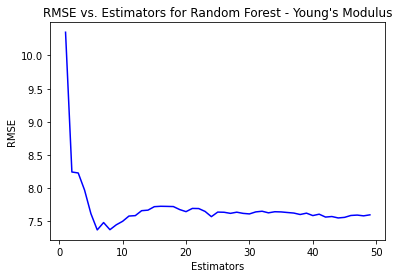

In [65]:
#Random Forest Regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

#Random Forest to predict Young's Modulus from compound composition
pred_youngs_mod = pd.read_csv("./Oxide_glass_1_5_02142020.csv").drop(["Index", "Code", "Glass #", "Author", "Year", "Trademark", "Glass_composition", "Shear modulus G (GPa)", "Poisson's ratio v"], axis = 1)

X = pred_youngs_mod.iloc[:, 0:len(compound_names)]
Y = pred_youngs_mod.iloc[:, len(compound_names)]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
estimators = [num for num in range(1, 50)]
mean_absolute_errors = []
for i in estimators:
    regressor = RandomForestRegressor(n_estimators=i, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mean_absolute_errors.append(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.plot(estimators, mean_absolute_errors, "b")
plt.title("RMSE vs. Estimators for Random Forest - Young's Modulus")
plt.xlabel("Estimators")
plt.ylabel("RMSE") #plot train test on same plot, compare between Without Feature selection and with Feature selection

In [66]:
#Random Forest Regressor to predict 
#https://satishgunjal.com/kfold/
kf = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(RandomForestRegressor(random_state= 42), X, Y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
rmse(score.mean())

Scores for each fold are: [-49.28469629 -56.48436196 -40.38386972 -48.22422688 -53.15781552]
rmse= 7.04


In [67]:
#Take a break to now focus on using LASSO to extract the best features

#--MARK -- transformed_samples_by_features --> has all the data you need

In [68]:
from sklearn.linear_model import Lasso

all_feature_names = transformed_samples_by_features.columns
all_feature_names

Index(['AtomicNumber', 'AtomicPeriod', 'AtomicGroup', 'AtomicWeight',
       'EmpiricalRadius', 'CalculaterRadius', 'MolarVolume',
       'Electronegativity', 'AbsoluteMeltingPoint', 'Oxidation_States',
       ...
       'AtomicGroup Inverse Logarithmic', 'AtomicWeight Inverse Logarithmic',
       'EmpiricalRadius Inverse Logarithmic',
       'CalculaterRadius Inverse Logarithmic',
       'MolarVolume Inverse Logarithmic',
       'Electronegativity Inverse Logarithmic',
       'AbsoluteMeltingPoint Inverse Logarithmic',
       'Oxidation_States Inverse Logarithmic',
       'Bond dissociation energy Inverse Logarithmic',
       'Assumed CN Inverse Logarithmic'],
      dtype='object', length=132)

In [69]:
lasso = Lasso(alpha = 0.1) #Change based on log scale, 1.0, 0.5, etc.

In [70]:
#LASSO for Young's Modulus

X_youngs = transformed_samples_by_features.values
Y_youngs = pd.read_csv("./Oxide_glass_1_5_02142020.csv")["Young's modulus E (GPa)"].values

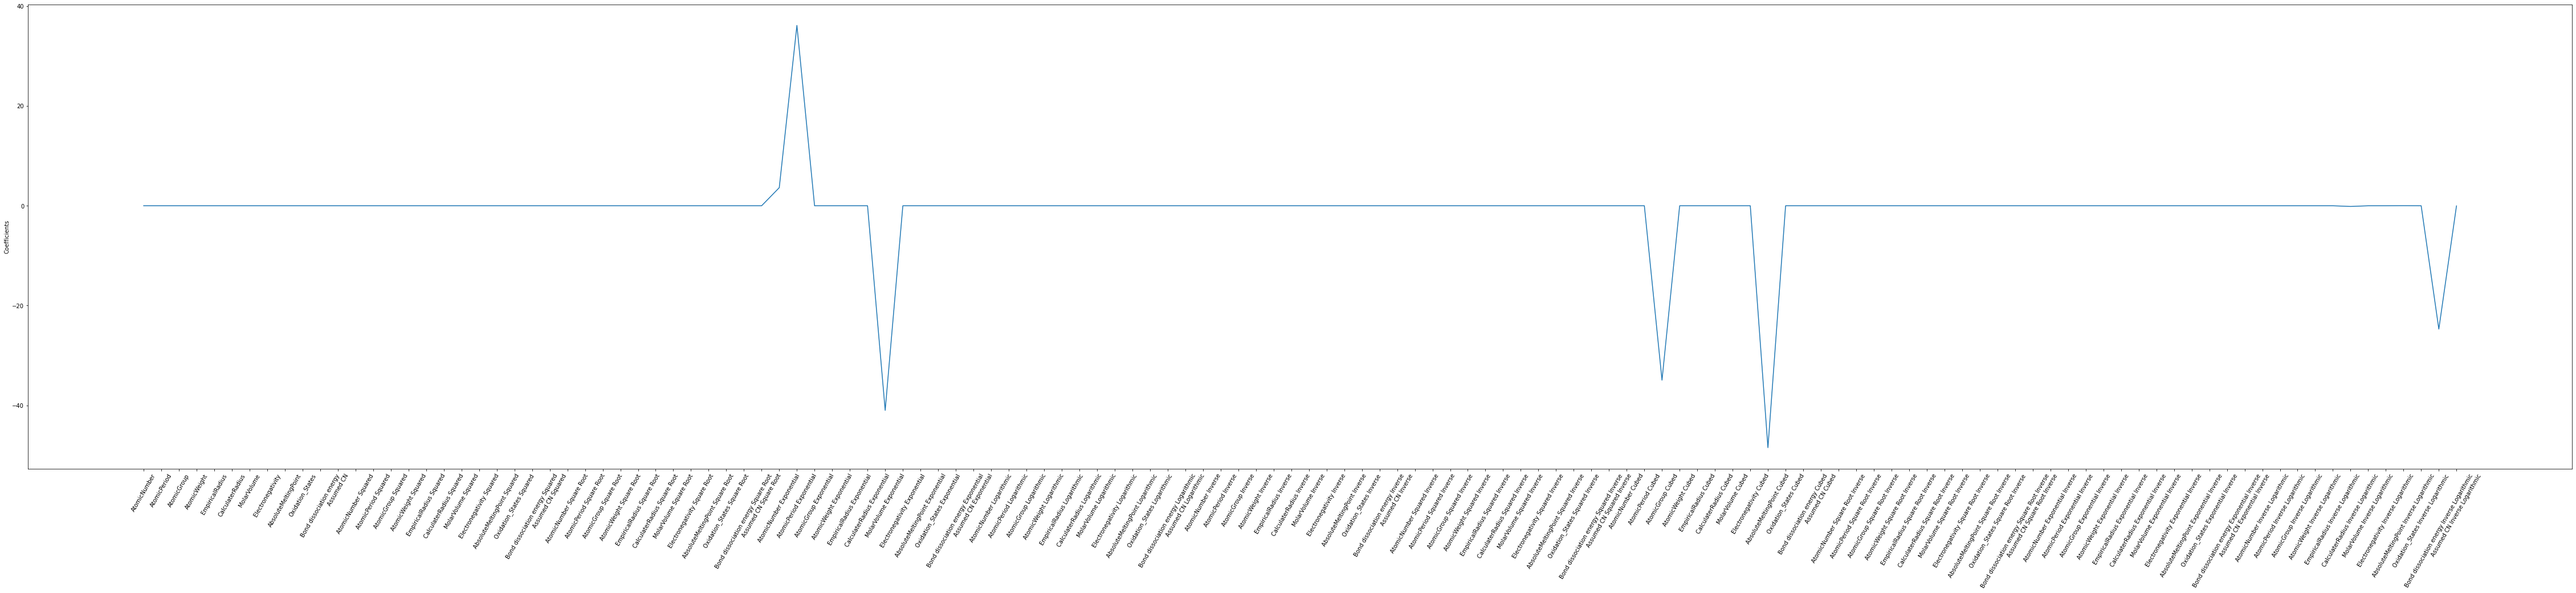

In [71]:
lasso_coeff_youngs = lasso.fit(X_youngs, Y_youngs).coef_
plt.rcParams["figure.figsize"] = (80,15)
plotting_youngs = plt.plot(range(len(all_feature_names)), lasso_coeff_youngs)
plotting_youngs = plt.xticks(range(len(all_feature_names)), all_feature_names, rotation=60)
plotting_youngs = plt.ylabel("Coefficients")
plt.show() #Do cross-validation

#Change labelling for x-axis

In [72]:
feature_names_to_coeff = {}
for i in range(len(all_feature_names)):
    feature_names_to_coeff[all_feature_names[i]] = lasso_coeff_youngs[i]
feature_names_to_coeff #Delete all zero terms

#Rank non-zero features from high to low based on coeffs (abs val)

{'AtomicNumber': 0.0,
 'AtomicPeriod': 0.0,
 'AtomicGroup': -0.0,
 'AtomicWeight': 0.0,
 'EmpiricalRadius': 0.0,
 'CalculaterRadius': 0.0,
 'MolarVolume': -0.0,
 'Electronegativity': -0.0,
 'AbsoluteMeltingPoint': 0.0,
 'Oxidation_States': 0.0,
 'Bond dissociation energy': -0.0,
 'Assumed CN': -0.0,
 'AtomicNumber Squared': 0.0,
 'AtomicPeriod Squared': 0.0,
 'AtomicGroup Squared': -0.0,
 'AtomicWeight Squared': 0.0,
 'EmpiricalRadius Squared': 0.0,
 'CalculaterRadius Squared': 0.0,
 'MolarVolume Squared': -0.0,
 'Electronegativity Squared': -0.0,
 'AbsoluteMeltingPoint Squared': -0.0,
 'Oxidation_States Squared': 0.0,
 'Bond dissociation energy Squared': -0.0,
 'Assumed CN Squared': -0.0,
 'AtomicNumber Square Root': 0.0,
 'AtomicPeriod Square Root': 0.0,
 'AtomicGroup Square Root': -0.0,
 'AtomicWeight Square Root': 0.0,
 'EmpiricalRadius Square Root': 0.0,
 'CalculaterRadius Square Root': 0.0,
 'MolarVolume Square Root': -0.0,
 'Electronegativity Square Root': -0.0,
 'AbsoluteMeltin

In [73]:
#Different random seeds, but one train-test-split
#Each seed has its own train set (choose random seed, maybe 5, 10 or other)
#Train different lambda on train set --> you will then have a model
#You will then predict the training set using the model and the test set, calculate RMSE
#Then try different lambda

#Once you have best alpha, run again on all data 1603 x 132 without train-test, rank from highest to lowest (abs value)

#New dataset with top features, then run a new randomforest (compare)